In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Import evaluation metrics


In [2]:
file_path = '/content/Titanic_test.csv'
df=pd.read_csv(file_path)

In [3]:
# Load the dataset
titanicTest_data = pd.read_csv(file_path)
df = titanicTest_data.copy()
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
#### To Start exploratorying data analysis (EDA) & Data Prepocessing ######
# step 1. Check for missing values
missing_values = df.isnull().sum()

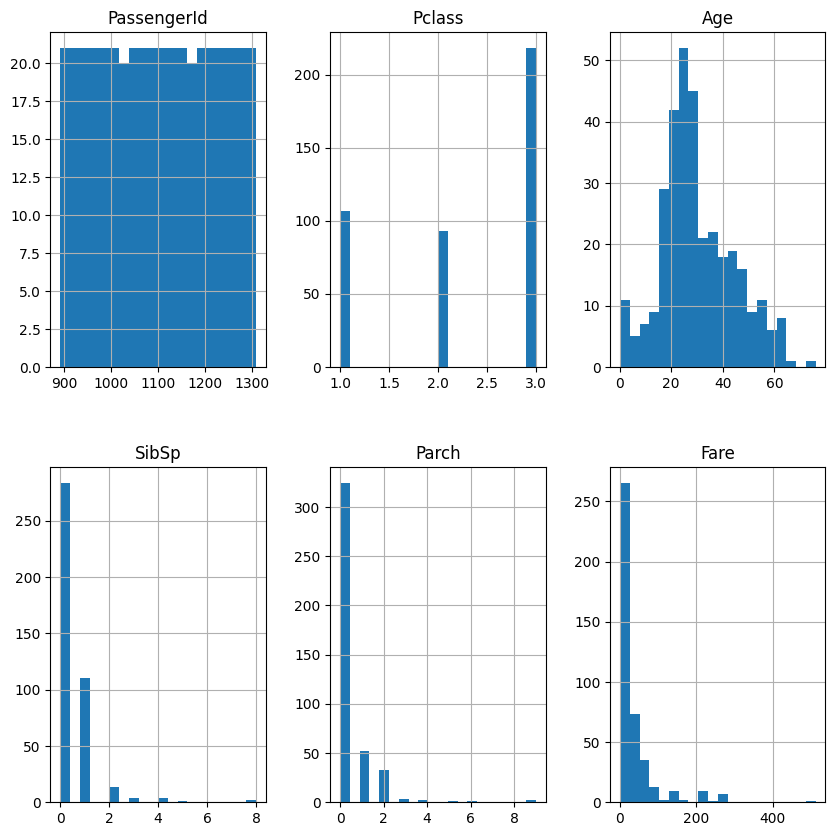

In [5]:
# step 2. Distributioning of numeric features
numericFeatures = df.select_dtypes(include=['int64', 'float64']).columns
numericDistributions = df[numericFeatures].hist(bins=20, figsize=(10, 10), layout=(2, 3))

<ipython-input-6-b7410bc20d78>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


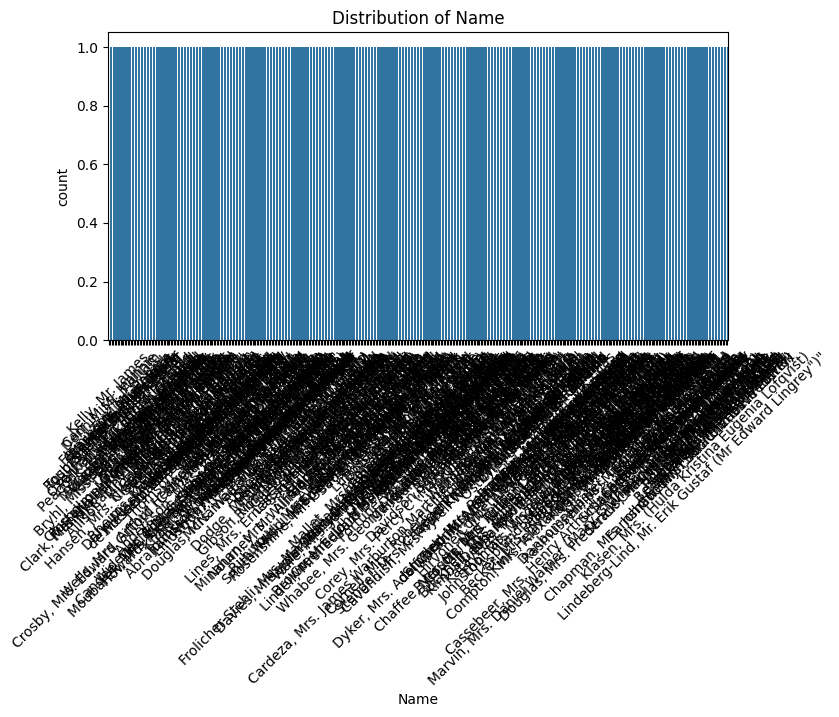

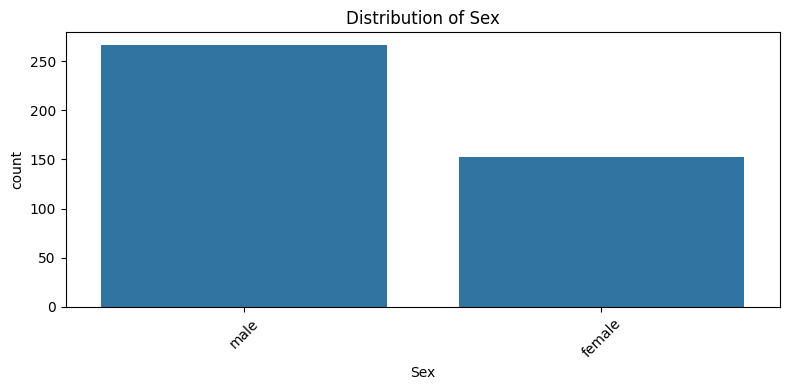

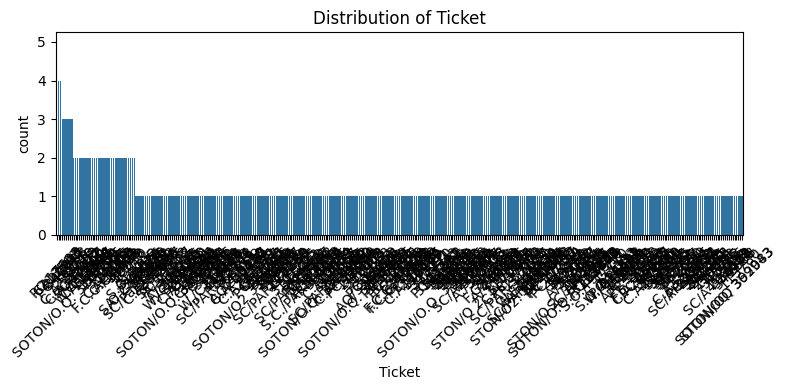

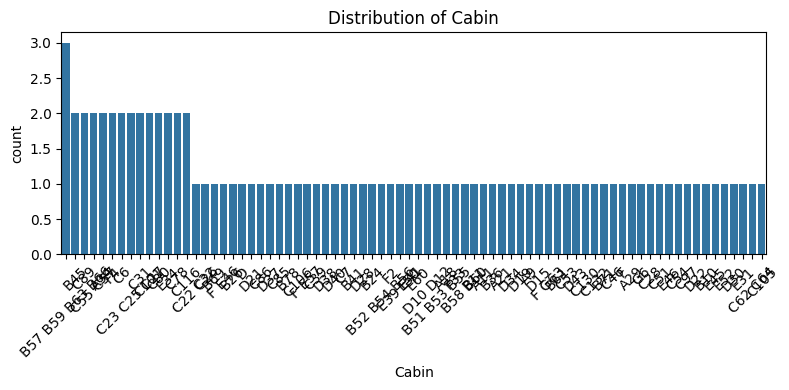

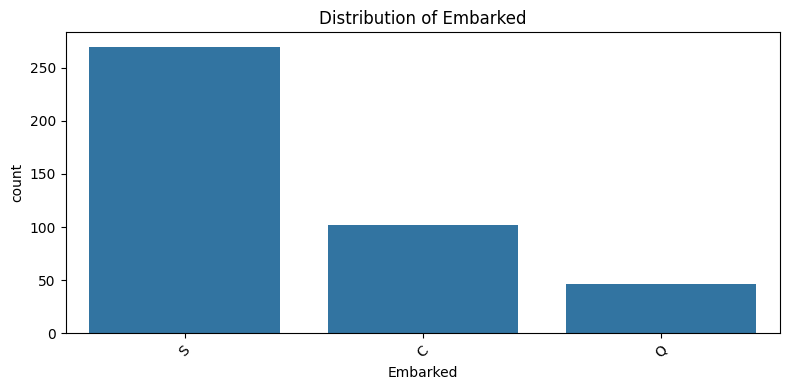

In [6]:
# step 3. Distribution of categorical features
categoricalFatures = df.select_dtypes(include=['object']).columns
categorical_distributions = {}
for feature in categoricalFatures:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    categorical_distributions[feature] = df[feature].value_counts()


In [7]:
# Display missing values and basic findings
missing_values

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


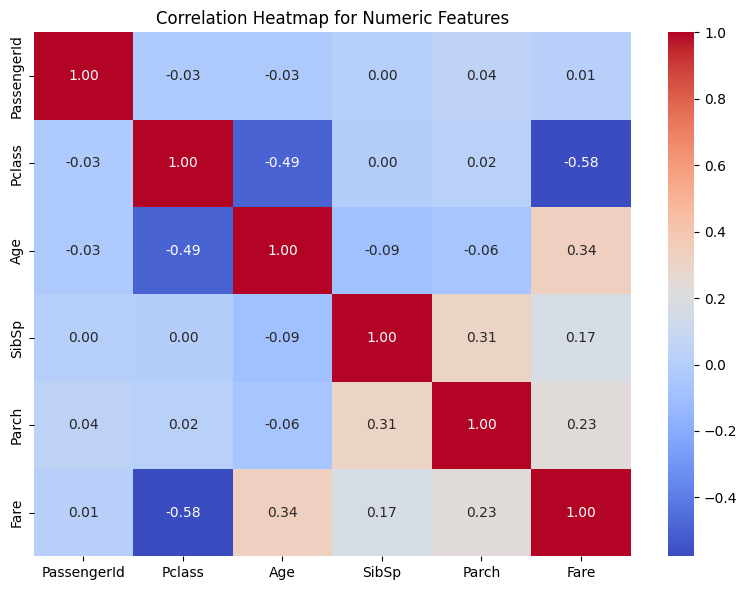

In [8]:
# step 4. Correlation heatmap for numeric features
correlationMatrix = df[numericFeatures].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numeric Features')
plt.tight_layout()
plt.show()

In [9]:
# Examine the features, their types, and summary statistics
featuresInfo = titanicTest_data.info()
summaryStatistics = titanicTest_data.describe(include='all')

(featuresInfo, summaryStatistics)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


(None,
         PassengerId      Pclass              Name   Sex         Age  \
 count    418.000000  418.000000               418   418  332.000000   
 unique          NaN         NaN               418     2         NaN   
 top             NaN         NaN  Kelly, Mr. James  male         NaN   
 freq            NaN         NaN                 1   266         NaN   
 mean    1100.500000    2.265550               NaN   NaN   30.272590   
 std      120.810458    0.841838               NaN   NaN   14.181209   
 min      892.000000    1.000000               NaN   NaN    0.170000   
 25%      996.250000    1.000000               NaN   NaN   21.000000   
 50%     1100.500000    3.000000               NaN   NaN   27.000000   
 75%     1204.750000    3.000000               NaN   NaN   39.000000   
 max     1309.000000    3.000000               NaN   NaN   76.000000   
 
              SibSp       Parch    Ticket        Fare            Cabin Embarked  
 count   418.000000  418.000000       418  41

In [10]:
########### Data Cleansing and Preparion #############

# Clean the dataset (handling missing values where needed for visualization)
titanicTest_data_cleaned = titanicTest_data.copy()

# Fill missing values in 'Age' with the median for visualization purposes
titanicTest_data_cleaned['Age'].fillna(titanicTest_data_cleaned['Age'].median())

# Fill missing 'Fare' with the median for visualization purposes
titanicTest_data_cleaned['Fare'].fillna(titanicTest_data_cleaned['Fare'].median())

# For simplicity, drop rows with missing 'Embarked' data for now
titanicTest_data_cleaned = titanicTest_data_cleaned.dropna(subset=['Embarked'])


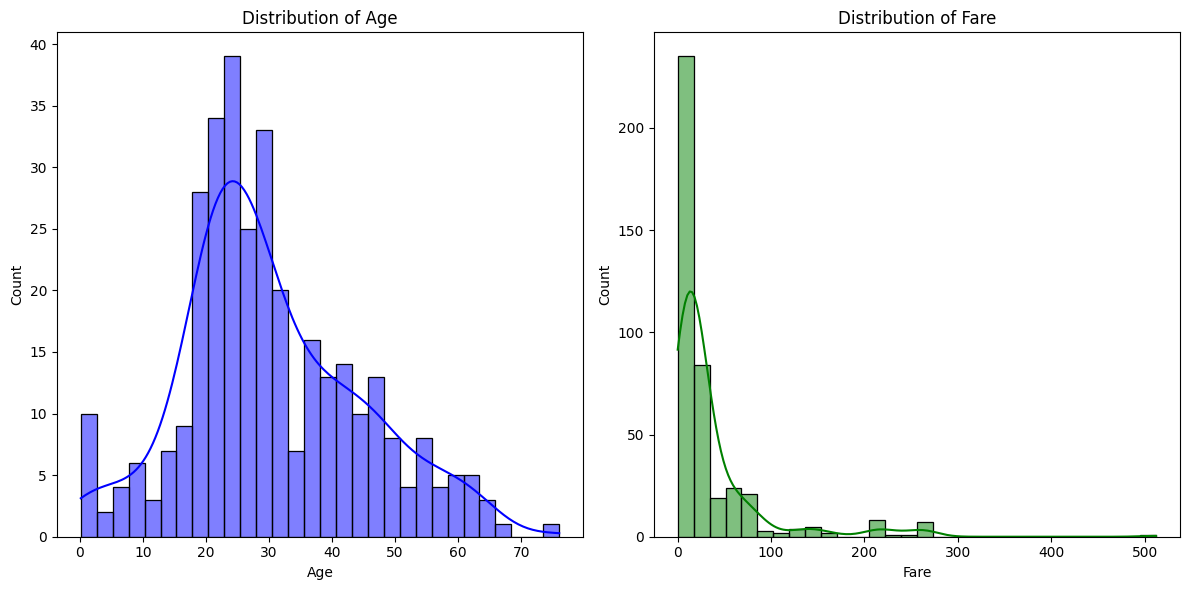

In [11]:
# Histograms of numerical features: Age and Fare
plt.figure(figsize=(12, 6))

# Age histogram
plt.subplot(1, 2, 1)
sns.histplot(titanicTest_data_cleaned['Age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')

# Fare histogram
plt.subplot(1, 2, 2)
sns.histplot(titanicTest_data_cleaned['Fare'], kde=True, bins=30, color='green')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.tight_layout()
plt.show()



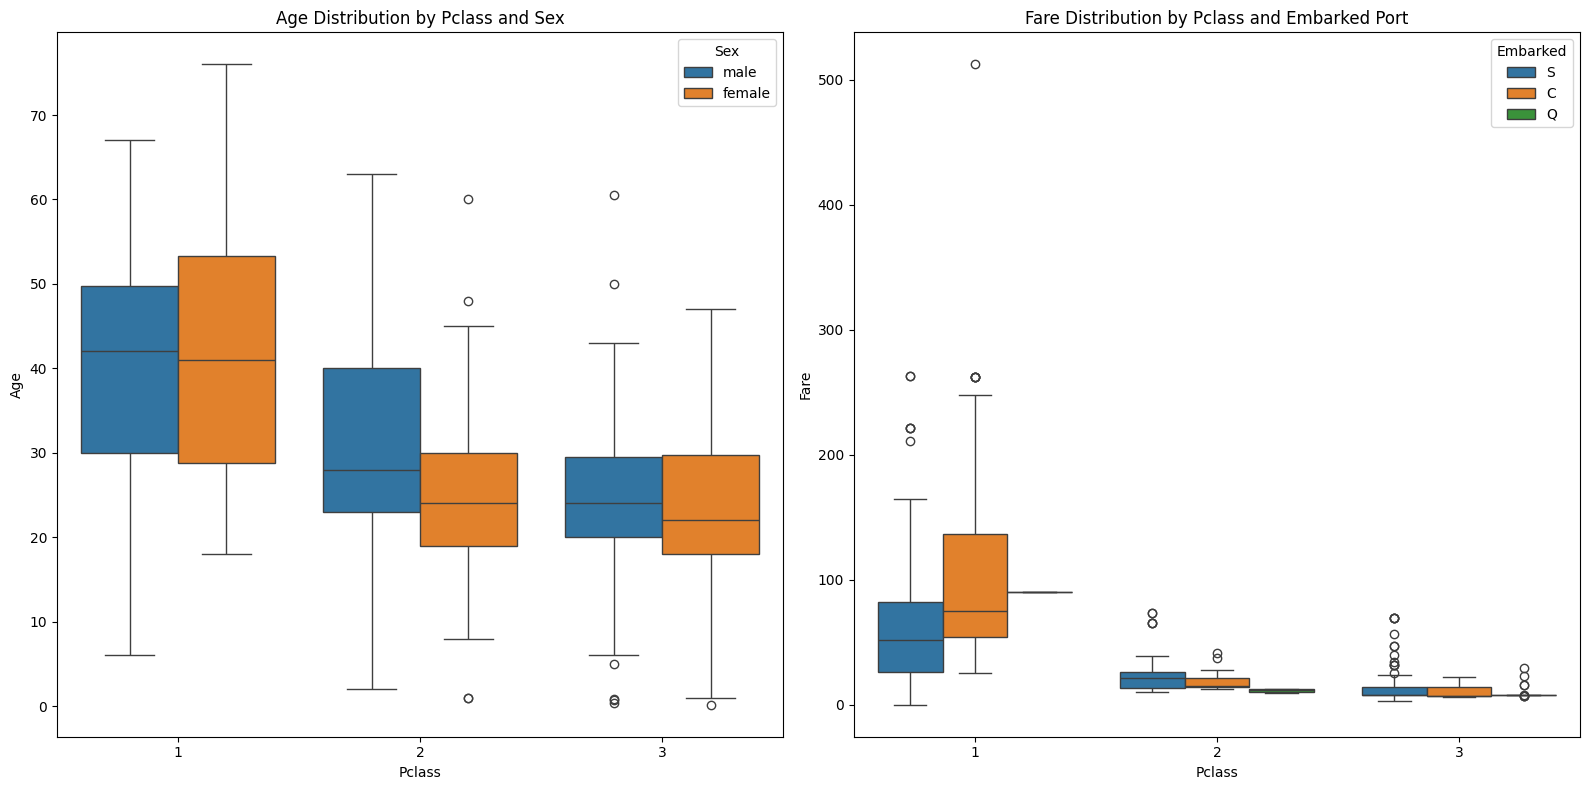

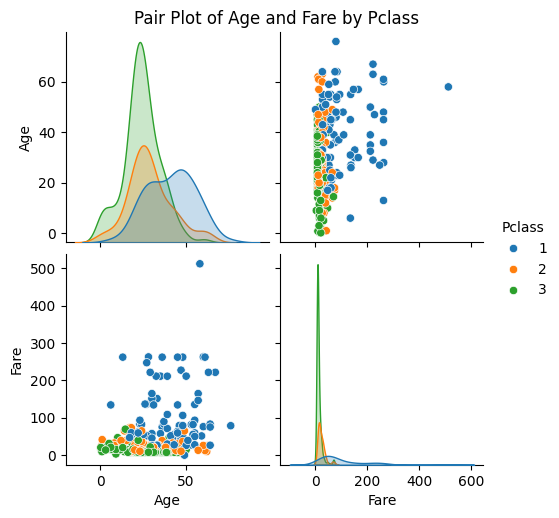

In [13]:
# Box plots for Age and Fare by Pclass and Sex
plt.figure(figsize=(16, 8))

# Age boxplot by Pclass and Sex
plt.subplot(1, 2, 1)
sns.boxplot(data=titanicTest_data_cleaned, x='Pclass', y='Age', hue='Sex')
plt.title('Age Distribution by Pclass and Sex')
plt.xlabel('Pclass')
plt.ylabel('Age')

# Fare boxplot by Pclass and Embarked
plt.subplot(1, 2, 2)
sns.boxplot(data=titanicTest_data_cleaned, x='Pclass', y='Fare', hue='Embarked')
plt.title('Fare Distribution by Pclass and Embarked Port')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

# Pair plot for numerical features
sns.pairplot(
    titanicTest_data_cleaned,
    vars=['Age', 'Fare'],
    hue='Pclass',
    palette='tab10',
    diag_kind='kde'
)
plt.suptitle('Pair Plot of Age and Fare by Pclass', y=1.02)
plt.show()

#  MODEL BUIDLING AND EVALUATION ####

In [14]:
#################  MODEL BUIDLING AND EVALUATION #############################

# Simulate a target variable for training since test data does not include 'Survived'
# Assume target based on a simple rule for demonstration

df['Survived'] = np.random.choice([0, 1], size=len(df))
# Select features for the model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'


In [15]:
# Preprocessing
# Encoding categorical variables
labelEncoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    labelEncoders[col] = le

In [16]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Fare'] = imputer.fit_transform(df[['Fare']])

In [17]:
# For Feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
# Build the Logistic Regression model pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))])


In [20]:
# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(random_state=42))])

In [21]:
# Predictions
y_pred = pipeline.predict(X_test)

In [22]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

(accuracy, conf_matrix, class_report)


(0.5119047619047619,
 array([[18, 23],
        [18, 25]]),
 '              precision    recall  f1-score   support\n\n           0       0.50      0.44      0.47        41\n           1       0.52      0.58      0.55        43\n\n    accuracy                           0.51        84\n   macro avg       0.51      0.51      0.51        84\nweighted avg       0.51      0.51      0.51        84\n')

In [23]:
# Calculate probabilities and ROC metrics
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Survived)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)


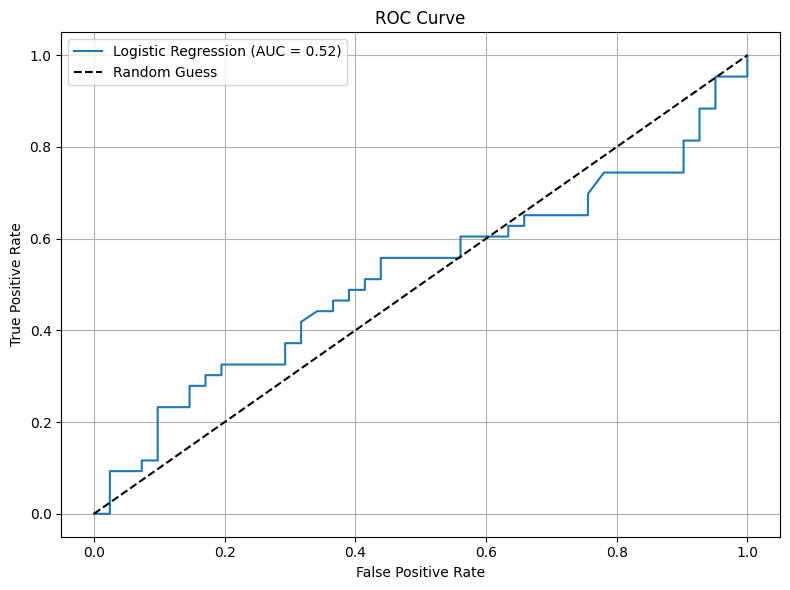

In [24]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
